In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score    
import warnings
warnings.filterwarnings('ignore')

In [35]:
#loading and reading the dataset 
df = pd.read_csv('sensor_data.csv')


print(df.head())


                                  time  battery_voltage  humidity  motion  \
0  2025-09-22 16:51:49.417242573+00:00            3.085      64.7   15034   
1  2025-09-22 16:56:09.969507892+00:00            3.083      65.0   15035   
2  2025-09-22 16:58:11.079514507+00:00            3.084      64.6   15043   
3  2025-09-22 17:00:15.641085678+00:00            3.085      65.1   15067   
4  2025-09-22 17:02:20.512016546+00:00            3.085      65.1   15087   

   temperature  
0        25.29  
1        25.29  
2        25.29  
3        25.26  
4        25.27  


In [36]:
#data shape
print("Data Shape:", df.shape)

Data Shape: (290, 5)


In [37]:
#column names
print("\nColumn Names:", df.columns.tolist())


Column Names: ['time', 'battery_voltage', 'humidity', 'motion', 'temperature']


In [38]:
# data types
print("\nData Types:\n", df.dtypes)



Data Types:
 time                object
battery_voltage    float64
humidity           float64
motion               int64
temperature        float64
dtype: object


In [39]:
#data preprocessing and cleaning
#clean column names
df.columns = df.columns.str.strip().str.lower()
#checking for missing values
print("\nMissing Values:\n", df.isnull().sum())




Missing Values:
 time               0
battery_voltage    0
humidity           0
motion             0
temperature        0
dtype: int64


In [40]:
#data statistics
print("\nData Statistics:\n", df.describe())


Data Statistics:
        battery_voltage    humidity        motion  temperature
count       290.000000  290.000000    290.000000   290.000000
mean          3.085200   64.863448  16276.875862    26.301724
std           0.000923    3.387997    601.023393     0.752615
min           3.083000   52.000000  15034.000000    24.690000
25%           3.085000   63.925000  15777.500000    25.610000
50%           3.085000   65.100000  16266.000000    26.270000
75%           3.086000   66.800000  16658.500000    26.910000
max           3.088000   70.300000  17440.000000    27.700000


In [41]:
#motion data distribution
print("\nMotion value counts:\n", df['motion'].value_counts())


Motion value counts:
 motion
16018    12
16789     6
15651     5
15655     4
16689     4
         ..
17428     1
17430     1
17432     1
17433     1
17440     1
Name: count, Length: 238, dtype: int64


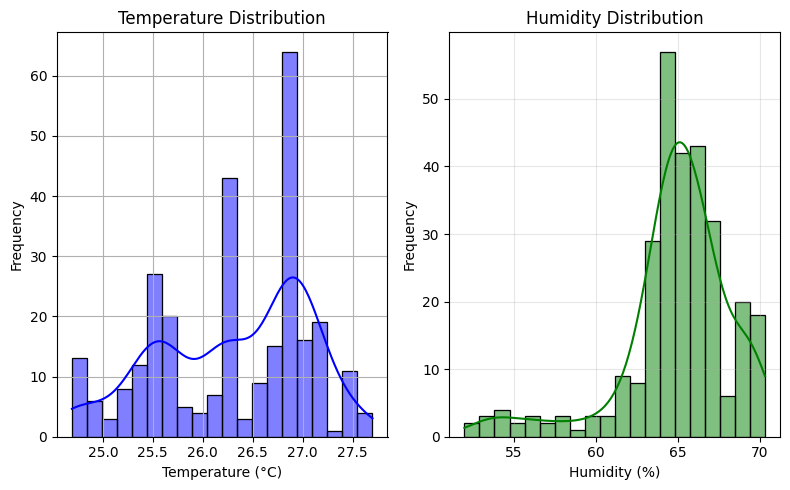

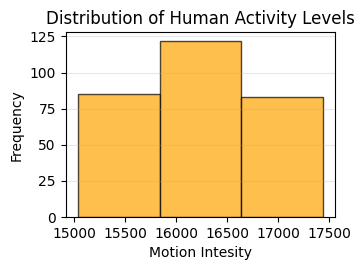

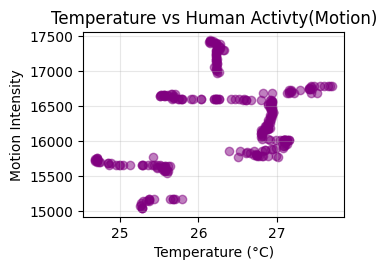

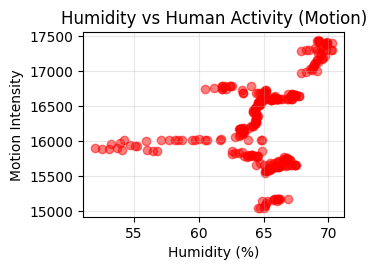

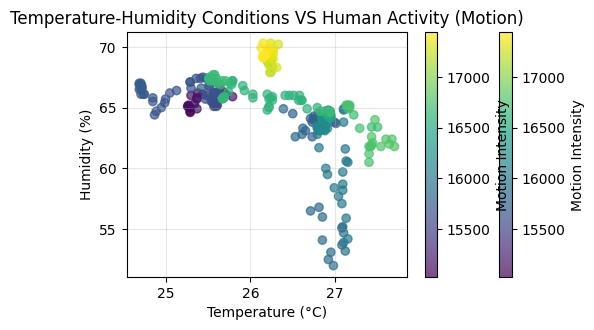

In [42]:
#detailed EDA in regards to human activity patterns
#visualisation
plt.figure(figsize=(8,5))

#plot 1: temperature distribution
plt.subplot(1, 2, 1)
sns.histplot(df['temperature'], bins=20, kde=True, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid()

#plot 2: humidity distribution
plt.subplot(1, 2, 2)
sns.histplot(df['humidity'], bins=20, kde=True, color='green')
plt.title('Humidity Distribution') 
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#plot 3:mortion distribution
plt.subplot(2,2,3)
plt.hist(df['motion'], bins=3, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Human Activity Levels')
plt.xlabel('Motion Intesity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#plot 4: : Temperature vs Motion

plt.subplot(2,2,1)
plt.scatter(df['temperature'], df['motion'], alpha=0.5, color='purple')
plt.title('Temperature vs Human Activty(Motion)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Motion Intensity')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#plot 5: Humidity vs Motion
plt.subplot(2,2,3)
plt.scatter(df['humidity'], df['motion'], alpha=0.5, color='red')
plt.title('Humidity vs Human Activity (Motion)')
plt.xlabel('Humidity (%)')
plt.ylabel('Motion Intensity')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#plot 6: Combined plot(temperature vs Humidity colored by Motion)
plt.figure(figsize=(10,6))
plt.subplot(2,2,4)
scatter = plt.scatter(df['temperature'], df['humidity'], c=df['motion'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Motion Intensity')
plt.title('Temperature-Humidity Conditions VS Human Activity (Motion)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.colorbar(scatter, label='Motion Intensity')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()





=== CORRELATION ANALYSIS ===
correlation_matrix:
             temperature  humidity    motion
temperature     1.000000 -0.506854  0.365352
humidity       -0.506854  1.000000  0.366993
motion          0.365352  0.366993  1.000000


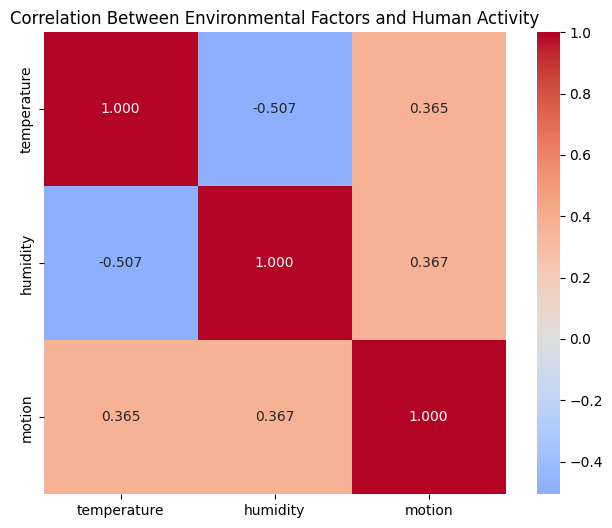


===CORRELATION INTERPRETATION===

Temperature_Motion Correlation: 0.37
Humidity_Motion Correlation: 0.37

->Temperature strongly increase human activity levels.
->Humidity strongly increase human activity levels.


In [43]:
#correlation analysis
print ("=== CORRELATION ANALYSIS ===")
correlation_matrix = df[['temperature', 'humidity','motion']].corr()
print("correlation_matrix:")
print(correlation_matrix)

#visualisation of correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True,fmt=".3f")
plt.title('Correlation Between Environmental Factors and Human Activity')
plt.show()

#interpretation of correlation results
temp_motion_corr = correlation_matrix.loc['temperature', 'motion']
humidity_motion_corr = correlation_matrix.loc['humidity', 'motion']

print(f"\n===CORRELATION INTERPRETATION===\n")
print(f"Temperature_Motion Correlation: {temp_motion_corr:.2f}")
print(f"Humidity_Motion Correlation: {humidity_motion_corr:.2f}\n")

if abs(temp_motion_corr) > 0.3:
    direction = "increase" if temp_motion_corr > 0 else "decrease"
    print(f"->Temperature strongly {direction} human activity levels.")

if abs(humidity_motion_corr) > 0.3:
    direction = "increase" if humidity_motion_corr > 0 else "decrease"
    print(f"->Humidity strongly {direction} human activity levels.")   

In [44]:
# Linear Regression Model training and interpretation
# prepare features and target variable  
X = df[['temperature', 'humidity']]#environment factors 
y = df['motion']#human activity level  

#split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#creating and training linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#making predictions
y_pred = model.predict(X_test)

#model coefficients and equation
print("\n===LINEAR REGRESSION MODEL===\n")
print(f"Intercept(baseline motion): {model.intercept_:.2f}")
print(f"Temperature Coefficient: {model.coef_[0]:.2f}")
print(f"Humidity Coefficient: {model.coef_[1]:.2f}\n")

print(f"\nRegression Equation:\n Predicted Motion = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * Temperature) + ({model.coef_[1]:.2f} * Humidity)\n")




===LINEAR REGRESSION MODEL===

Intercept(baseline motion): -6916.41
Temperature Coefficient: 578.15
Humidity Coefficient: 123.23


Regression Equation:
 Predicted Motion = -6916.41 + (578.15 * Temperature) + (123.23 * Humidity)



In [45]:
#model evaluation and performance metrics(interpretation)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("===MODEL PERFOMANCE===\n")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")   
print(f"R-squared (R²): {r2:.2f}\n")

if r2 > 0.7:
    print("->The model explains a significant portion of the variance in human activity levels.")
elif r2 > 0.4:
    print("->The model has a moderate explanatory power for human activity levels.")
else:
    print("->The model has limited explanatory power for human activity levels.")

 #model interpretation
print("\n===MODEL INTERPRETATION===\n")
print("Coefficient Analysis:")
print(f"- Each 1°C  temperature increase changes motion by {model.coef_[0]:.2f} units")
print(f"- Each 1% increase in humidity changes motion by {model.coef_[1]:.2f} units")   




===MODEL PERFOMANCE===

Mean Squared Error (MSE): 150858.30
Root Mean Squared Error (RMSE): 388.40
R-squared (R²): 0.63

->The model has a moderate explanatory power for human activity levels.

===MODEL INTERPRETATION===

Coefficient Analysis:
- Each 1°C  temperature increase changes motion by 578.15 units
- Each 1% increase in humidity changes motion by 123.23 units


In [46]:
# Determine optimal conditions for maximum human activity
if model.coef_[0] > 0:
    temp_effect = "higher temperatures increase activity"
else:
    temp_effect = "lower temperatures increase activity"
    
if model.coef_[1] > 0:
    humidity_effect = "higher humidity increases activity"
else:
    humidity_effect = "lower humidity increases activity"

print(f"\n→ Human activity tends to be higher when: {temp_effect} and {humidity_effect}")


→ Human activity tends to be higher when: higher temperatures increase activity and higher humidity increases activity


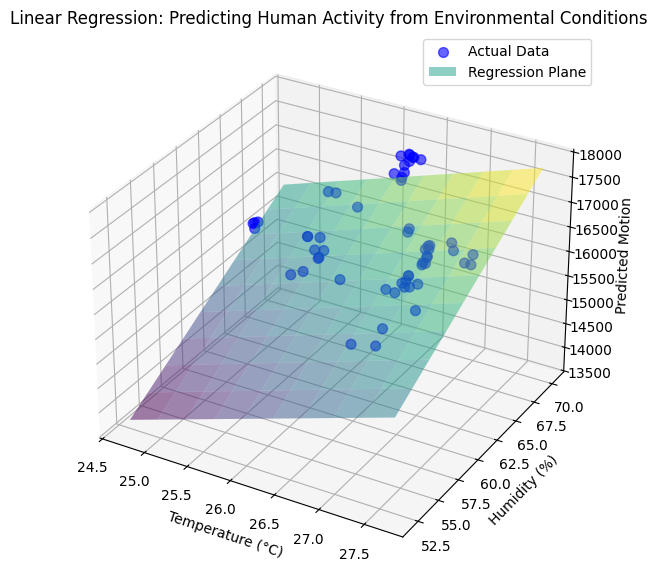

In [47]:
# 3D Visualsization of the model predictions 
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

#plot actual data points
ax.scatter(X_test['temperature'], X_test['humidity'], y_test, c='blue', label='Actual Data', alpha=0.6,s=50)

# Create mesh for regression plane
temp_range = np.linspace(X['temperature'].min(), X['temperature'].max(), 10)
humidity_range = np.linspace(X['humidity'].min(), X['humidity'].max(), 10)
temp_mesh, humidity_mesh = np.meshgrid(temp_range, humidity_range)

# Calculate predicted motion for the mesh
motion_pred_mesh = model.intercept_ + model.coef_[0] * temp_mesh + model.coef_[1] * humidity_mesh

# Plot regression plane
ax.plot_surface(temp_mesh, humidity_mesh, motion_pred_mesh, 
               alpha=0.5, cmap='viridis', label='Regression Plane')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Predicted Motion')
ax.set_title('Linear Regression: Predicting Human Activity from Environmental Conditions')
plt.legend()
plt.show()


In [48]:
#saving the model for future use
import joblib
joblib.dump(model, 'smart_Environment_model.h5')

#


['smart_Environment_model.h5']